Phân tích đại học bách khoa hà nội 



In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from facebook_scraper import get_profile

In [65]:
raw_df =  pd.read_csv('/workspaces/22022546_T--Nguy-n-D-ng/Data/ktqdNEU.csv')
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        114 non-null    int64  
 1   text                           113 non-null    object 
 2   post_text                      96 non-null     object 
 3   shared_text                    18 non-null     object 
 4   original_text                  0 non-null      float64
 5   time                           114 non-null    object 
 6   timestamp                      114 non-null    int64  
 7   image                          77 non-null     object 
 8   image_lowquality               114 non-null    object 
 9   images                         114 non-null    object 
 10  images_description             114 non-null    object 
 11  images_lowquality              114 non-null    object 
 12  images_lowquality_description  114 non-null    obj

CLEANING DATA

In [66]:
used_data = raw_df[['post_id','post_text','text','time','images_description','comments','shares','comments_full','reactors','reactions','reaction_count']]
used_data

,post_id,post_text,text,time,images_description,comments,shares,comments_full,reactors,reactions,reaction_count
0,732948108863591,"Thư viện điện tử 11 triệu USD, triệu cuốn sách...","Thư viện điện tử 11 triệu USD, triệu cuốn sách...",2023-11-25 11:25:19,"['May be an image of text', 'May be an image o...",175,77,"[{'comment_id': '648537020689218', 'comment_ur...",[],"{'like': 1123, 'love': 382, 'haha': 4, 'wow': ...",1542
1,323743073790793,NaN,"SUN, NOV 26\nChương trình trải nghiệm: 1 ngày ...",2023-11-24 10:31:29,[],628,0,[],NaN,NaN,1300
2,732286135596455,Trường Đại học Kinh tế Quốc dân tổ chức thành ...,Trường Đại học Kinh tế Quốc dân tổ chức thành ...,2023-11-24 07:07:41,"[""May be an image of 1 person, dais and text t...",0,0,[],"[{'name': 'Lê Quang Mênhh', 'link': 'https://f...","{'like': 82, 'love': 7}",89
3,730862365738832,CHÚC MỪNG PGS.TS. LÊ THANH HÀ - KHOA KINH TẾ H...,CHÚC MỪNG PGS.TS. LÊ THANH HÀ - KHOA KINH TẾ H...,2023-11-21 14:17:08,[],55,22,"[{'comment_id': '250924264662383', 'comment_ur...","[{'name': 'Thùy Linh', 'link': 'https://facebo...","{'like': 840, 'love': 364, 'wow': 12, 'care': 11}",1227
4,730382429120159,Ngày 20/11 hàng năm không chỉ là dịp để tri ân...,Ngày 20/11 hàng năm không chỉ là dịp để tri ân...,2023-11-20 16:02:01,"['May be an image of 15 people and text', 'May...",1,8,[],"[{'name': 'Bao Thanh Thien', 'link': 'https://...","{'like': 872, 'love': 431, 'care': 11}",1314
...,...,...,...,...,...,...,...,...,...,...,...
109,676193010732292,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-27 00:00:07,[],220,72,"[{'comment_id': '1354054158850753', 'comment_u...","[{'name': 'Mai Trang', 'link': 'https://facebo...","{'like': 656, 'love': 244, 'haha': 2, 'wow': 1...",907
110,1270136470311946,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-26 05:59:52,[],111,48,"[{'comment_id': '643658751072857', 'comment_ur...","[{'name': 'Phan Kim Nhã', 'link': 'https://fac...","{'like': 193, 'love': 124, 'care': 3}",320
111,1237176660290613,NaN,"SAT, AUG 26\nLỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY N...",2023-08-26 05:36:06,[],5,0,[],NaN,NaN,218
112,1358907194696015,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-26 00:01:04,[],988,272,"[{'comment_id': '823626852603976', 'comment_ur...","[{'name': 'Quang Thao Phan', 'link': 'https://...","{'like': 2804, 'love': 1257, 'haha': 12, 'wow'...",4105


In [67]:
cleaned_data = used_data.fillna({"reactions" : "{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'care': 0, 'sad': 0, 'angry': 0}",
                                "post_text" : "No post text"})
def replace_empty_string(value):
    return value if ((isinstance(value, str)) and (value != '[]')) else 'No photo description available'
def replace_empty_comment(cm):
    return cm if ((isinstance(cm, str)) and (cm != '[]')) else 'No comment available'
def replace_empty_reactors(r):
    if (len(str(r)) > 4):
        return r
    else: 
        return 'No reactors available'
def reset_reaction_count(rc):
    for i in range(len(rc)):
        if cleaned_data['reactions'][i] == "{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'care': 0, 'sad': 0, 'angry': 0}":
             cleaned_data.loc[i, 'reaction_count'] = 0
cleaned_data["images_description"] = cleaned_data["images_description"].apply(replace_empty_string)
cleaned_data["comments_full"] = cleaned_data["comments_full"].apply(replace_empty_comment)
cleaned_data["reactors"] = cleaned_data["reactors"].apply(replace_empty_reactors)
reset_reaction_count(cleaned_data)
cleaned_data

,post_id,post_text,text,time,images_description,comments,shares,comments_full,reactors,reactions,reaction_count
0,732948108863591,"Thư viện điện tử 11 triệu USD, triệu cuốn sách...","Thư viện điện tử 11 triệu USD, triệu cuốn sách...",2023-11-25 11:25:19,"['May be an image of text', 'May be an image o...",175,77,"[{'comment_id': '648537020689218', 'comment_ur...",No reactors available,"{'like': 1123, 'love': 382, 'haha': 4, 'wow': ...",1542
1,323743073790793,No post text,"SUN, NOV 26\nChương trình trải nghiệm: 1 ngày ...",2023-11-24 10:31:29,No photo description available,628,0,No comment available,No reactors available,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0
2,732286135596455,Trường Đại học Kinh tế Quốc dân tổ chức thành ...,Trường Đại học Kinh tế Quốc dân tổ chức thành ...,2023-11-24 07:07:41,"[""May be an image of 1 person, dais and text t...",0,0,No comment available,"[{'name': 'Lê Quang Mênhh', 'link': 'https://f...","{'like': 82, 'love': 7}",89
3,730862365738832,CHÚC MỪNG PGS.TS. LÊ THANH HÀ - KHOA KINH TẾ H...,CHÚC MỪNG PGS.TS. LÊ THANH HÀ - KHOA KINH TẾ H...,2023-11-21 14:17:08,No photo description available,55,22,"[{'comment_id': '250924264662383', 'comment_ur...","[{'name': 'Thùy Linh', 'link': 'https://facebo...","{'like': 840, 'love': 364, 'wow': 12, 'care': 11}",1227
4,730382429120159,Ngày 20/11 hàng năm không chỉ là dịp để tri ân...,Ngày 20/11 hàng năm không chỉ là dịp để tri ân...,2023-11-20 16:02:01,"['May be an image of 15 people and text', 'May...",1,8,No comment available,"[{'name': 'Bao Thanh Thien', 'link': 'https://...","{'like': 872, 'love': 431, 'care': 11}",1314
...,...,...,...,...,...,...,...,...,...,...,...
109,676193010732292,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-27 00:00:07,No photo description available,220,72,"[{'comment_id': '1354054158850753', 'comment_u...","[{'name': 'Mai Trang', 'link': 'https://facebo...","{'like': 656, 'love': 244, 'haha': 2, 'wow': 1...",907
110,1270136470311946,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-26 05:59:52,No photo description available,111,48,"[{'comment_id': '643658751072857', 'comment_ur...","[{'name': 'Phan Kim Nhã', 'link': 'https://fac...","{'like': 193, 'love': 124, 'care': 3}",320
111,1237176660290613,No post text,"SAT, AUG 26\nLỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY N...",2023-08-26 05:36:06,No photo description available,5,0,No comment available,No reactors available,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0
112,1358907194696015,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-26 00:01:04,No photo description available,988,272,"[{'comment_id': '823626852603976', 'comment_ur...","[{'name': 'Quang Thao Phan', 'link': 'https://...","{'like': 2804, 'love': 1257, 'haha': 12, 'wow'...",4105


Prepare data

In [68]:
month = []
hour = []
days = []
Date = []
Time = []
for i in range(len(cleaned_data)):
    t = cleaned_data['time'][i].split(" ")
    p_time = t[1].split(":")
    p_date = t[0].split("-")
    Time.append(t[1])
    Date.append(t[0])
    month.append(int(p_date[1]))
    hour.append(int(p_time[0]))
    days.append(p_date[2])
cleaned_data['Day'] = days
cleaned_data['Month'] = month
cleaned_data['Date'] = Date
cleaned_data['Time'] = Time
cleaned_data['Hour'] = hour   

In [69]:
import ast
thich = []
yeu_thich = []
haha = []
wow = []
thuong_thuong = []
buon = []
phan_no = []
for i in range(len(cleaned_data)):
     if ((cleaned_data['reaction_count'][i] != 0)):
            dictionary_result = ast.literal_eval(cleaned_data['reactions'][i])
            so_luot_thich = dictionary_result.get('thích', 0) + dictionary_result.get('like',0)
            so_yeu_thich = dictionary_result.get('yêu thích', 0) + dictionary_result.get('love', 0)
            so_haha = dictionary_result.get('haha', 0)
            so_wow = dictionary_result.get('wow',0)
            so_thuong_thuong = dictionary_result.get('thương thương',0) +dictionary_result.get('care', 0)
            so_buon = dictionary_result.get('buồn', 0) + dictionary_result.get('sad', 0)
            so_phan_no = dictionary_result.get('phẫn nộ',0) + dictionary_result.get('angry', 0)
            thich.append(so_luot_thich)
            yeu_thich.append(so_yeu_thich)
            haha.append(so_haha)
            wow.append(so_wow)
            thuong_thuong.append(so_thuong_thuong)
            buon.append(so_buon)
            phan_no.append(so_phan_no)
     else:
            thich.append(0)
            yeu_thich.append(0)
            haha.append(0)
            wow.append(0)
            thuong_thuong.append(0)
            buon.append(0)
            phan_no.append(0)

In [70]:
cleaned_data['Thích'] = thich
cleaned_data['Yêu_thích'] = yeu_thich
cleaned_data['Haha'] = haha
cleaned_data['Wow'] = wow
cleaned_data['Thương_thương'] = thuong_thuong
cleaned_data['Buồn'] = buon
cleaned_data['Phẫn_nộ'] = phan_no

In [71]:
sorted_data = cleaned_data.sort_values(by = 'reaction_count', ascending=False)
sorted_data

,post_id,post_text,text,time,images_description,comments,shares,comments_full,reactors,reactions,...,Date,Time,Hour,Thích,Yêu_thích,Haha,Wow,Thương_thương,Buồn,Phẫn_nộ
95,685739823584420,No post text,NaN,2023-09-06 03:24:12,['May be an image of text'],114,18,"[{'comment_id': '6464439700339100', 'comment_u...","[{'name': 'Dương Ngọc Lan', 'link': 'https://f...","{'like': 4753, 'love': 1771, 'haha': 26, 'wow'...",...,2023-09-06,03:24:12,3,4753,1771,26,7,44,15,1
44,712447980913604,CHÚC MỪNG NGÀY PHỤ NỮ VIỆT NAM 20/10\n\n🌺 Nhân...,CHÚC MỪNG NGÀY PHỤ NỮ VIỆT NAM 20/10\n\n🌺 Nhân...,2023-10-20 01:00:09,"[""May be an image of text that says 'NH CONICN...",361,132,"[{'comment_id': '822701516273487', 'comment_ur...","[{'name': 'Danh Minh', 'link': 'https://facebo...","{'like': 3136, 'love': 2334, 'haha': 34, 'wow'...",...,2023-10-20,01:00:09,1,3136,2334,34,16,78,8,0
107,680243077467428,"Nam thanh, Nữ tú rạng ngời trong Lễ tốt nghiệp...","Nam thanh, Nữ tú rạng ngời trong Lễ tốt nghiệp...",2023-08-27 14:31:57,"['No photo description available.', 'No photo ...",164,45,"[{'comment_id': '1434628217117936', 'comment_u...","[{'name': 'Chu Mạnh', 'link': 'https://faceboo...","{'like': 4056, 'love': 1328, 'haha': 9, 'wow':...",...,2023-08-27,14:31:57,14,4056,1328,9,2,22,3,0
112,1358907194696015,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-26 00:01:04,No photo description available,988,272,"[{'comment_id': '823626852603976', 'comment_ur...","[{'name': 'Quang Thao Phan', 'link': 'https://...","{'like': 2804, 'love': 1257, 'haha': 12, 'wow'...",...,2023-08-26,00:01:04,0,2804,1257,12,9,21,1,1
77,696552629169806,LỘ DIỆN NHỮNG TÂN SINH VIÊN ĐẠT THÀNH TÍCH CAO...,LỘ DIỆN NHỮNG TÂN SINH VIÊN ĐẠT THÀNH TÍCH CAO...,2023-09-24 04:57:42,"[""May be an image of 8 people, dais and text t...",133,53,"[{'comment_id': '1448886172557142', 'comment_u...","[{'name': 'Danh Minh', 'link': 'https://facebo...","{'like': 2472, 'love': 774, 'haha': 2, 'wow': ...",...,2023-09-24,04:57:42,4,2472,774,2,10,18,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,857064789031139,No post text,"WED, OCT 11\nĐại hội lần thứ XVI Công đoàn Giá...",2023-10-11 03:40:24,No photo description available,0,0,No comment available,No reactors available,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",...,2023-10-11,03:40:24,3,0,0,0,0,0,0,0
1,323743073790793,No post text,"SUN, NOV 26\nChương trình trải nghiệm: 1 ngày ...",2023-11-24 10:31:29,No photo description available,628,0,No comment available,No reactors available,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",...,2023-11-24,10:31:29,10,0,0,0,0,0,0,0
59,709385851034617,No post text,"SAT, OCT 7\nLỄ KHAI GIẢNG HỆ VỪA HỌC VỪA LÀM",2023-10-06 05:51:24,No photo description available,1,0,No comment available,No reactors available,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",...,2023-10-06,05:51:24,5,0,0,0,0,0,0,0
60,301086612656028,No post text,"SAT, OCT 7\nLỄ KHAI GIẢNG VÀ TRAO BẰNG TIẾN SĨ",2023-10-06 03:16:26,No photo description available,0,0,No comment available,No reactors available,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",...,2023-10-06,03:16:26,3,0,0,0,0,0,0,0


Các thuộc tính của dữ liệu

In [72]:
cleaned_data.columns

Index(['post_id', 'post_text', 'text', 'time', 'images_description',
       'comments', 'shares', 'comments_full', 'reactors', 'reactions',
       'reaction_count', 'Day', 'Month', 'Date', 'Time', 'Hour', 'Thích',
       'Yêu_thích', 'Haha', 'Wow', 'Thương_thương', 'Buồn', 'Phẫn_nộ'],
      dtype='object')

ANALYSE DATA

Tổng số lượng, tỷ lệ, trung bình các reaction trong các bài viết 

In [73]:
s = pd.DataFrame({'Số lượng': [sum(thich),sum(yeu_thich),sum(haha),sum(wow),sum(thuong_thuong),sum(buon),sum(phan_no)],
                  'Phần trăm (%)': [(sum(thich)/sum(raw_df['reaction_count']))*100,
                                   (sum(yeu_thich)/sum(raw_df['reaction_count']))*100,
                                   (sum(haha)/sum(raw_df['reaction_count']))*100,
                                   (sum(wow)/sum(raw_df['reaction_count']))*100,
                                   (sum(thuong_thuong)/sum(raw_df['reaction_count']))*100,
                                   (sum(buon)/sum(raw_df['reaction_count']))*100,
                                   (sum(phan_no)/sum(raw_df['reaction_count']))*100],
                    'Trung bình/bài đăng' : [cleaned_data['Thích'].mean(), cleaned_data['Yêu_thích'].mean(),
                                    cleaned_data['Haha'].mean(), cleaned_data["Wow"].mean(),
                                    cleaned_data['Thương_thương'].mean(), cleaned_data['Buồn'].mean(), cleaned_data['Phẫn_nộ'].mean()]
                                    })
s.index = ['Thích','Yêu thích','Haha','Wow','Thương thương','Buồn','Phẫn nộ']
s

,Số lượng,Phần trăm (%),Trung bình/bài đăng
Thích,63558,65.930851,557.526316
Yêu thích,21455,22.255993,188.201754
Haha,2154,2.234417,18.894737
Wow,215,0.223027,1.885965
Thương thương,709,0.735470,6.219298
Buồn,997,1.034222,8.745614
Phẫn nộ,6,0.006224,0.052632


Vẽ biểu đồ


<Axes: >

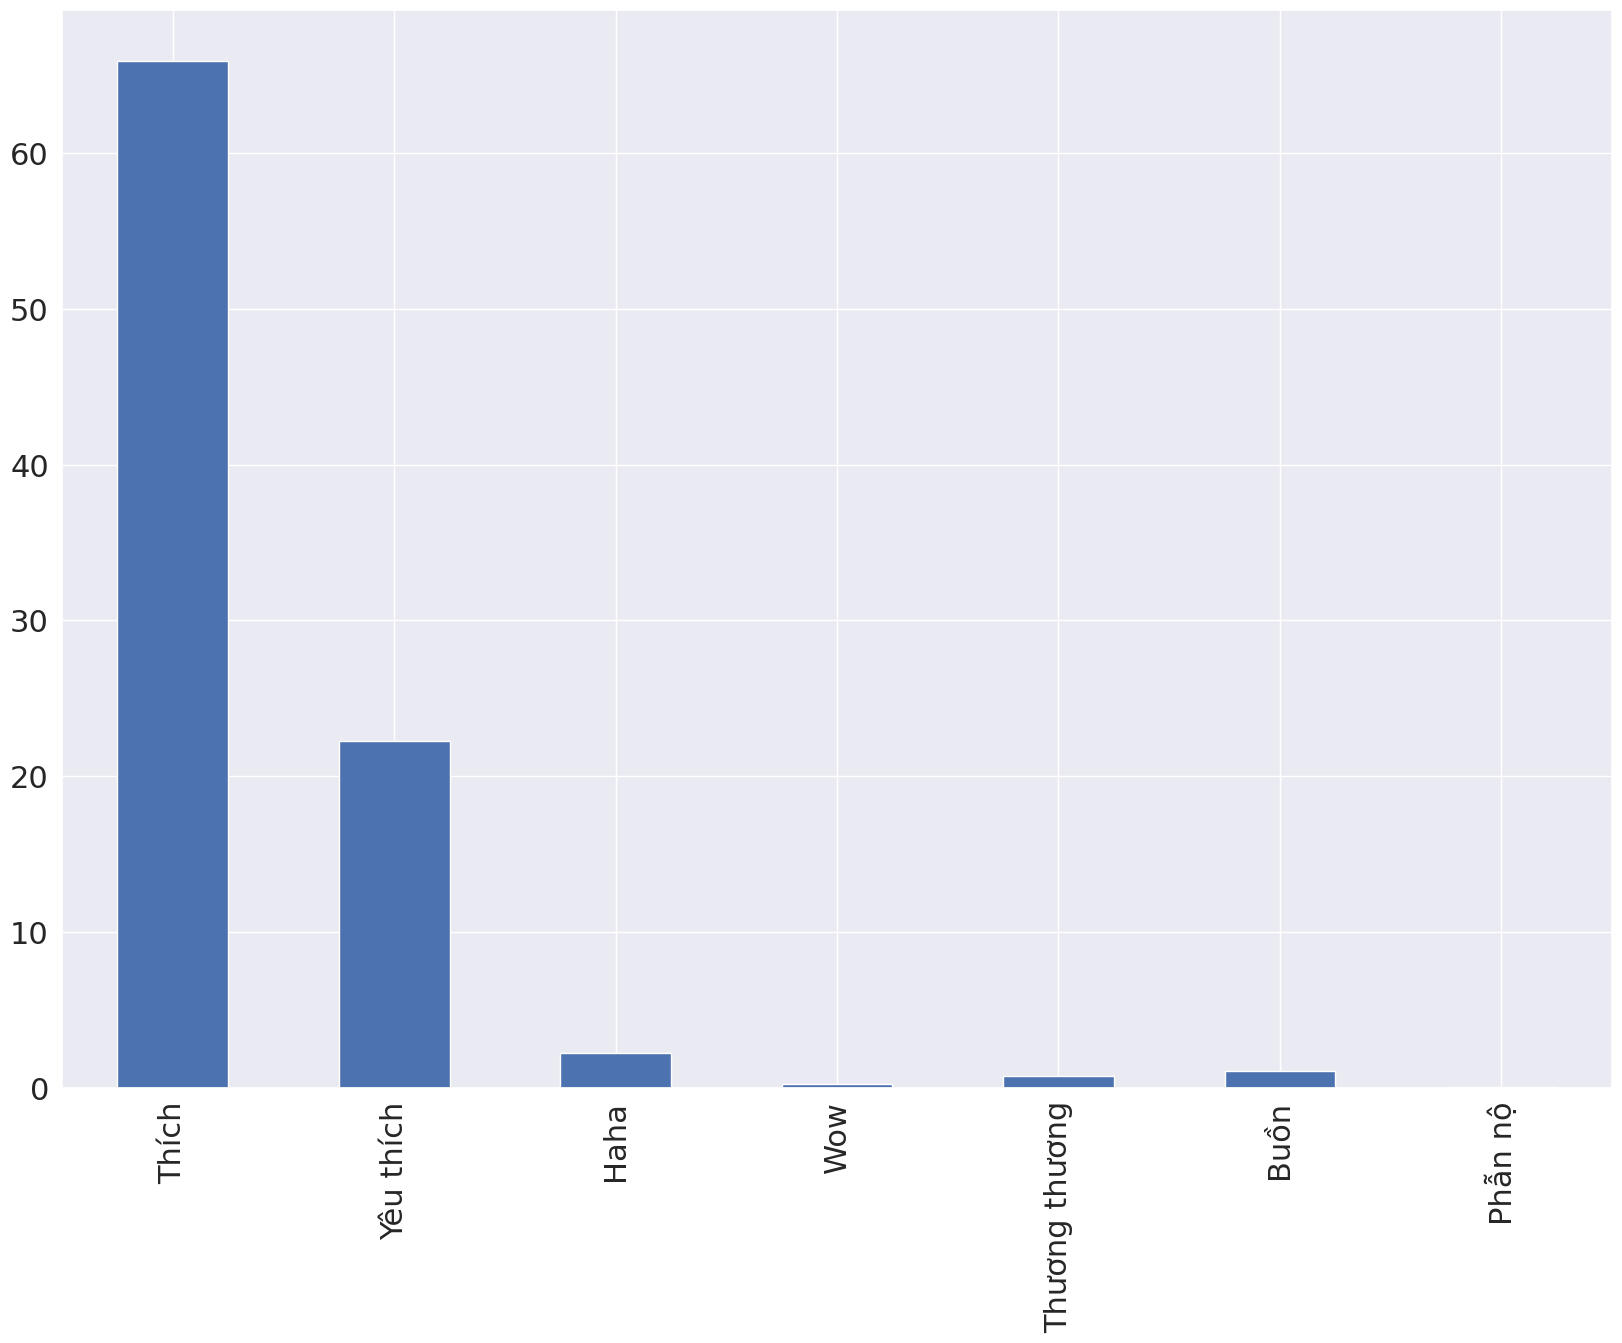

In [74]:
s['Phần trăm (%)'].plot(kind='bar', figsize=(20,14))

Số lượt chia sẻ trung bình mỗi bài viết

In [75]:
cleaned_data['shares'].mean()

21.56140350877193

Số lượt comment trung bình mỗi bài viết

In [76]:
cleaned_data['comments'].mean()

81.39473684210526

Bài đăng có nhiều lượt tương tác nhất 

In [77]:
highest_reaction_post = sorted_data.iloc[0]
highest_reaction_post

post_id                                                 685739823584420
post_text                                                  No post text
text                                                                NaN
time                                                2023-09-06 03:24:12
images_description                          ['May be an image of text']
comments                                                            114
shares                                                               18
comments_full         [{'comment_id': '6464439700339100', 'comment_u...
reactors              [{'name': 'Dương Ngọc Lan', 'link': 'https://f...
reactions             {'like': 4753, 'love': 1771, 'haha': 26, 'wow'...
reaction_count                                                     6617
Day                                                                  06
Month                                                                 9
Date                                                         202

Nội dung bài viết

In [78]:
highest_reaction_post['post_text']

'No post text'

Số lượt tương tác 

In [79]:
highest_reaction_post['reaction_count']

6617

In [80]:
highest_reaction_post['reactions']

"{'like': 4753, 'love': 1771, 'haha': 26, 'wow': 7, 'care': 44, 'sad': 15, 'angry': 1}"

In [81]:
first_row = highest_reaction_post
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']
reactions


{'like': 4753,
 'love': 1771,
 'haha': 26,
 'wow': 7,
 'care': 44,
 'sad': 15,
 'angry': 1,
 'shares': 18,
 'comments': 114}

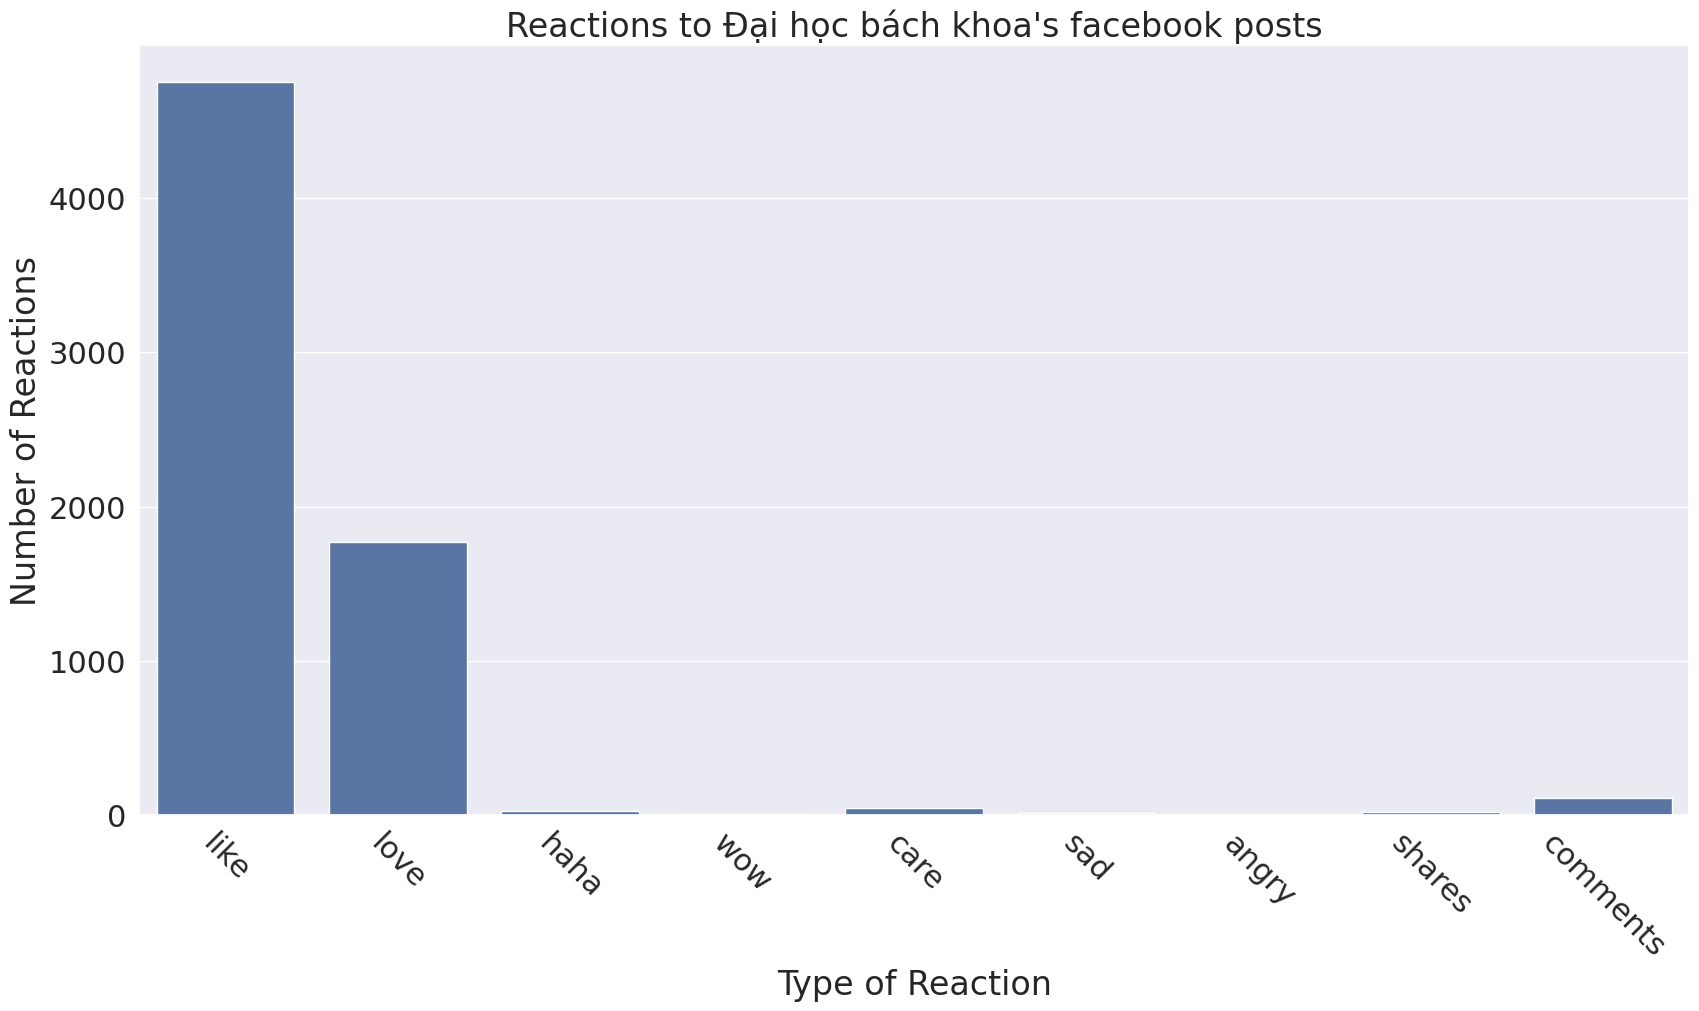

In [82]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(20,10)})
sns.set(font_scale=2)
# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
ax.set_title("Reactions to Đại học bách khoa's facebook posts")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

Số lượng bài viết trong 3 tháng gần nhất

Text(0, 0.5, 'Số lượng bài viết')

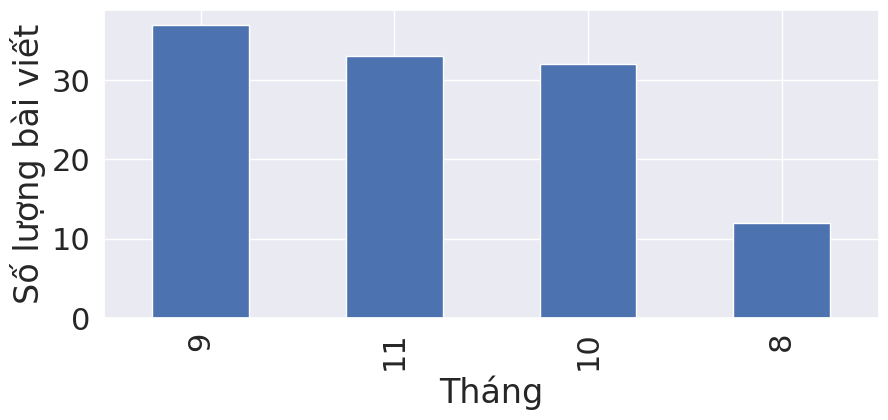

In [83]:
m = cleaned_data['Month'].value_counts()
bp = m.plot(kind='bar', figsize=(10,4))
bp.set_xlabel("Tháng")
bp.set_ylabel("Số lượng bài viết")

Thời điểm đăng bài 

Text(0, 0.5, 'Số bài đăng')

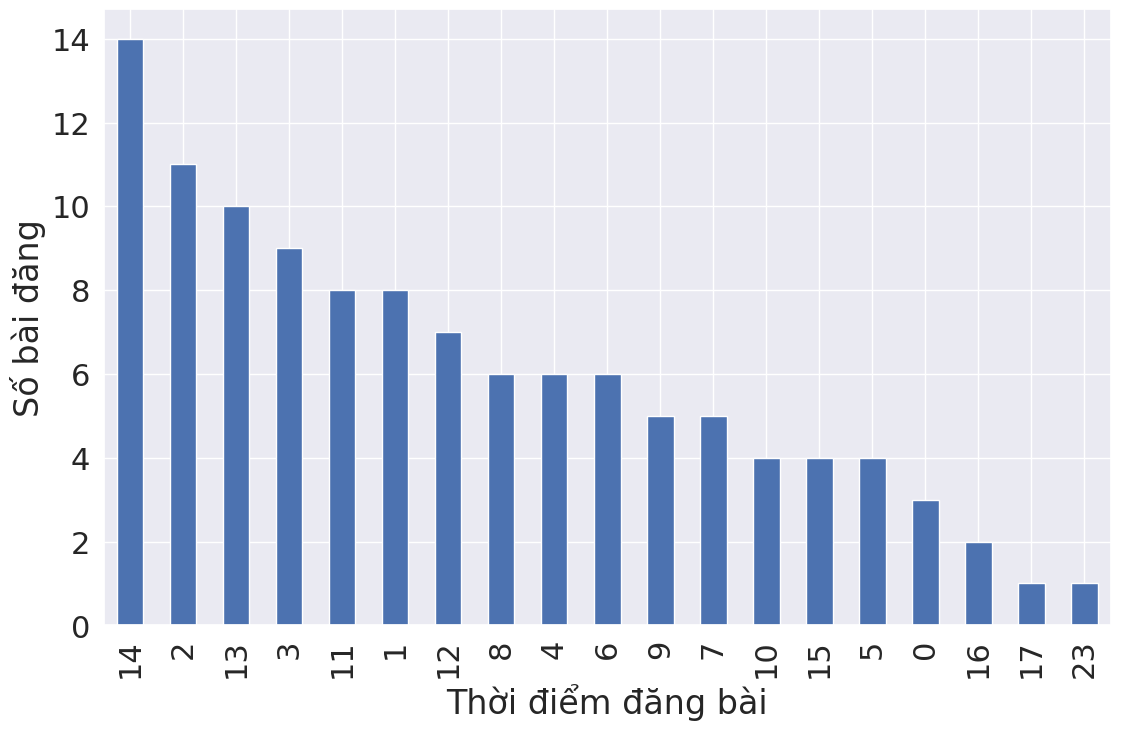

In [84]:
h = cleaned_data['Hour'].value_counts()
t = h.plot(kind = 'bar', figsize=(13,8))
t.set_xlabel('Thời điểm đăng bài')
t.set_ylabel('Số bài đăng')

Nhận xét: số bài đăng chủ yếu vào lúc 14h chiều

22788 615.8918918918919


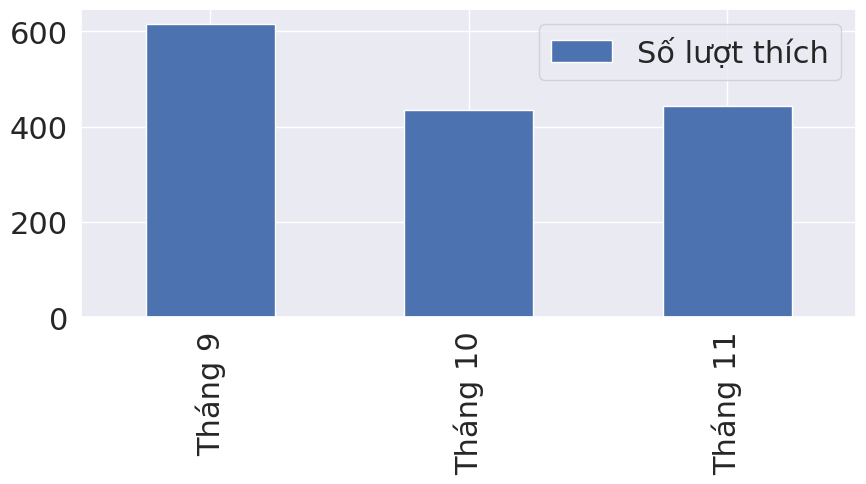

In [85]:
likes_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].Thích)
likes_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].Thích)
likes_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].Thích)
likes_per_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].Thích)/len(cleaned_data.loc[cleaned_data['Month'] == 9].Thích)
likes_per_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].Thích)/len(cleaned_data.loc[cleaned_data['Month'] == 10].Thích)
likes_per_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].Thích)/len(cleaned_data.loc[cleaned_data['Month'] == 11].Thích)
l = pd.DataFrame({'Số lượt thích': [likes_per_month_9,likes_per_month_10,likes_per_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))
print(str(likes_of_month_9)+ " " + str(likes_per_month_9))

Text(0, 0.5, 'reaction_count')

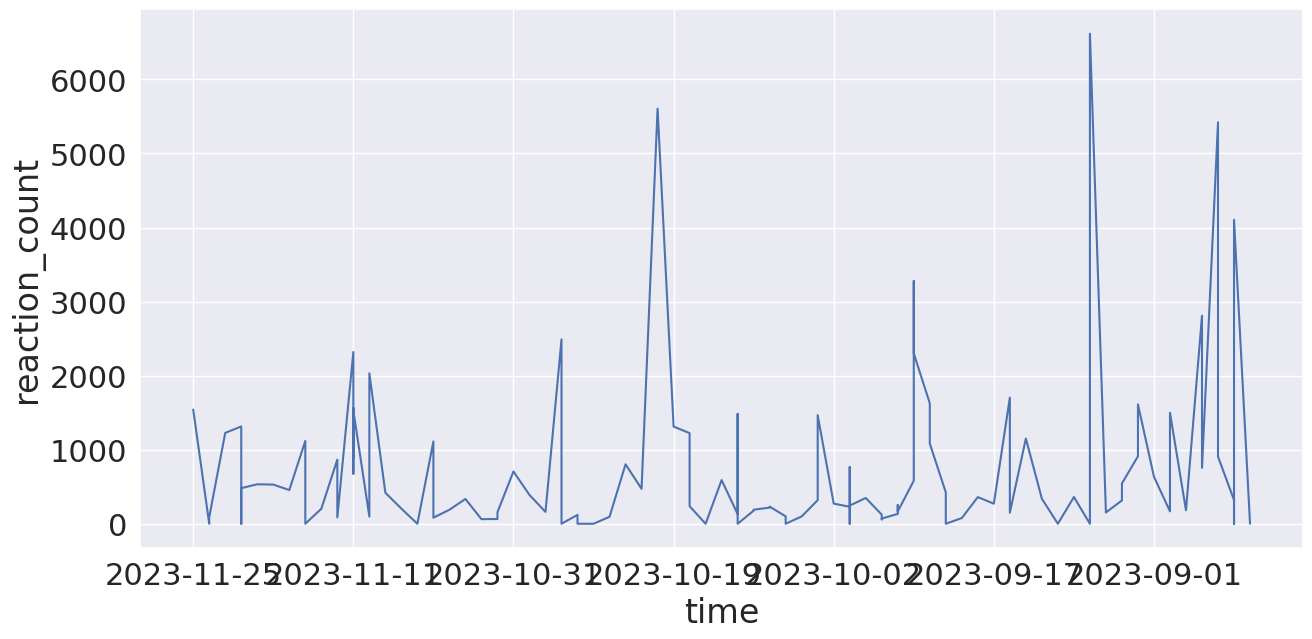

In [86]:
x = cleaned_data['Date'].to_list()
y = cleaned_data['reaction_count'].to_list()
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot()
ax.plot(x, y)
ax.set_xticks(np.arange(0, 10 * 7, 10))
ax.set_xlabel('time')
ax.set_ylabel('reaction_count')

5788 180.875


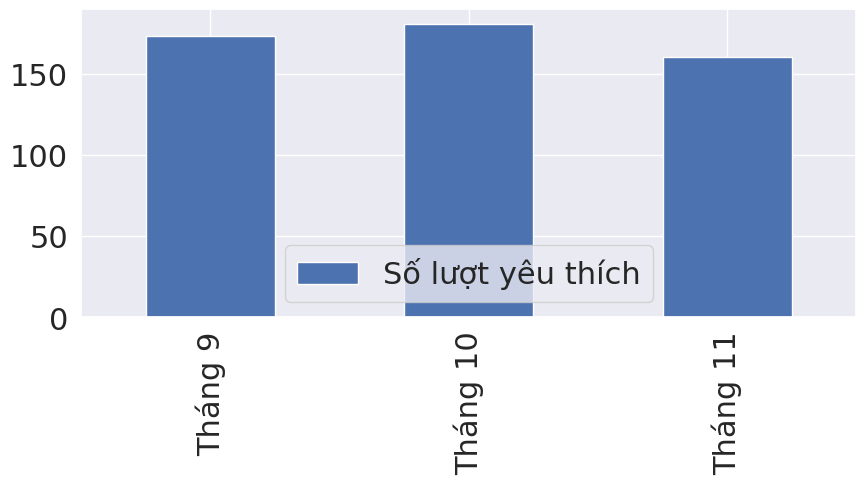

In [87]:
loves_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].Yêu_thích)
loves_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].Yêu_thích)
loves_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].Yêu_thích)
loves_per_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].Yêu_thích)/len(cleaned_data.loc[cleaned_data['Month'] == 9].Yêu_thích)
loves_per_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].Yêu_thích)/len(cleaned_data.loc[cleaned_data['Month'] == 10].Yêu_thích)
loves_per_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].Yêu_thích)/len(cleaned_data.loc[cleaned_data['Month'] == 11].Yêu_thích)
l = pd.DataFrame({'Số lượt yêu thích': [loves_per_month_9,loves_per_month_10,loves_per_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))
print(str(loves_of_month_10)+ " " + str(loves_per_month_10))

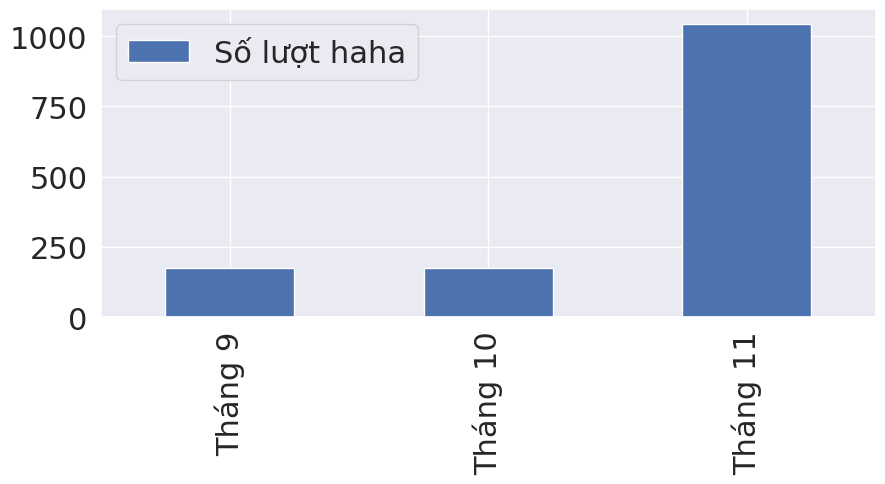

In [88]:
haha_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].Haha)
haha_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].Haha)
haha_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].Haha)
l = pd.DataFrame({'Số lượt haha': [haha_of_month_9,haha_of_month_10,haha_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

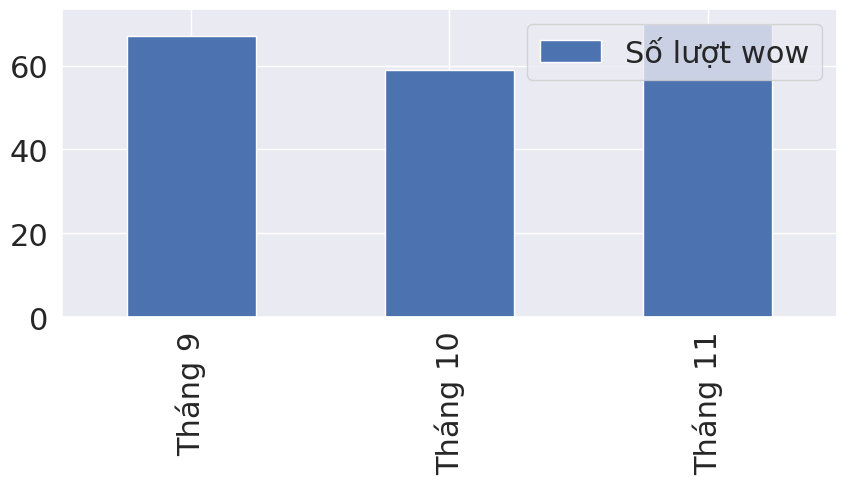

In [89]:
wow_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].Wow)
wow_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].Wow)
wow_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].Wow)
l = pd.DataFrame({'Số lượt wow': [wow_of_month_9,wow_of_month_10,wow_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

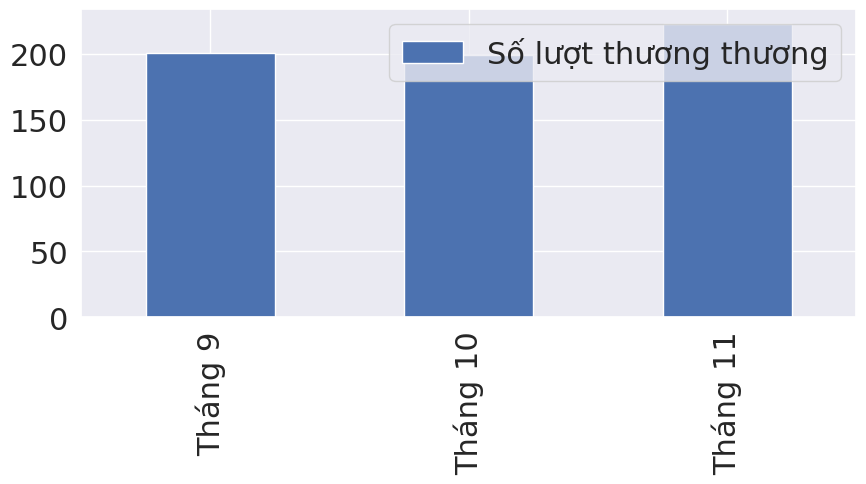

In [90]:
tt_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].Thương_thương)
tt_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].Thương_thương)
tt_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].Thương_thương)
l = pd.DataFrame({'Số lượt thương thương': [tt_of_month_9,tt_of_month_10,tt_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

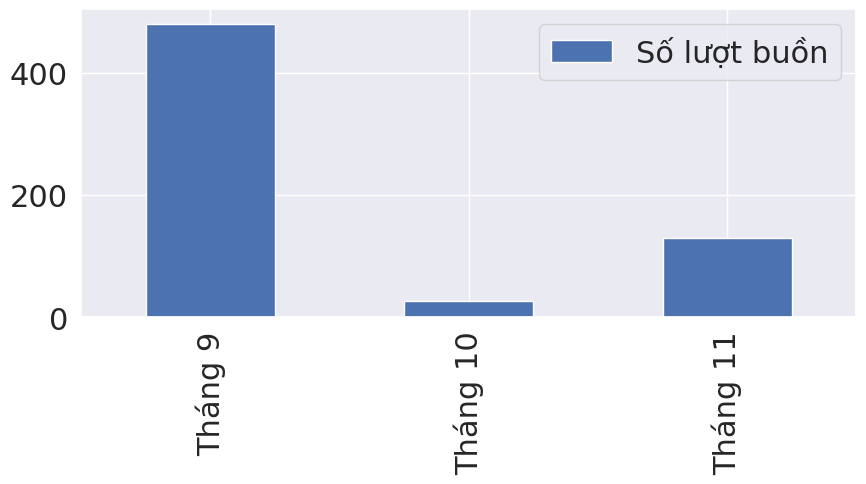

In [91]:
buon_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].Buồn)
buon_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].Buồn)
buon_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].Buồn)
l = pd.DataFrame({'Số lượt buồn': [buon_of_month_9,buon_of_month_10,buon_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

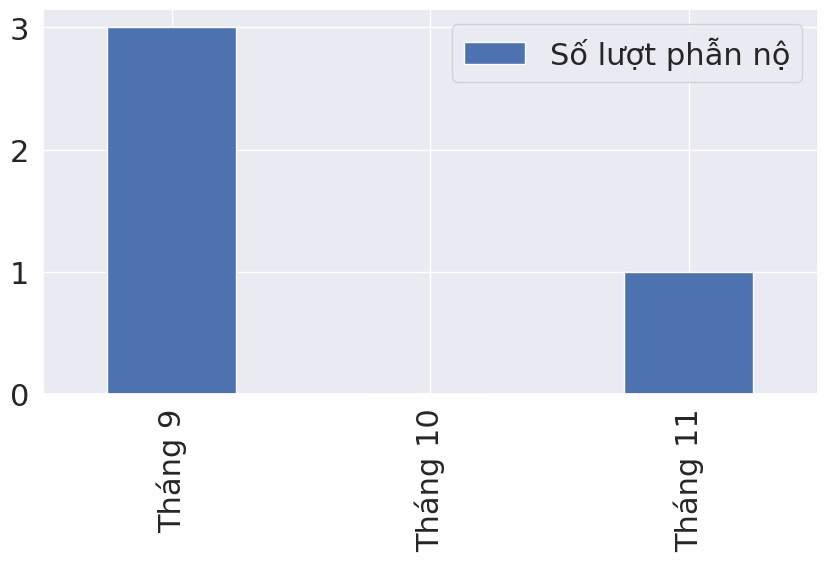

In [92]:
phan_no_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].Phẫn_nộ)
phan_no_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].Phẫn_nộ)
phan_no_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].Phẫn_nộ)
l = pd.DataFrame({'Số lượt phẫn nộ': [phan_no_of_month_9,phan_no_of_month_10,phan_no_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,5))

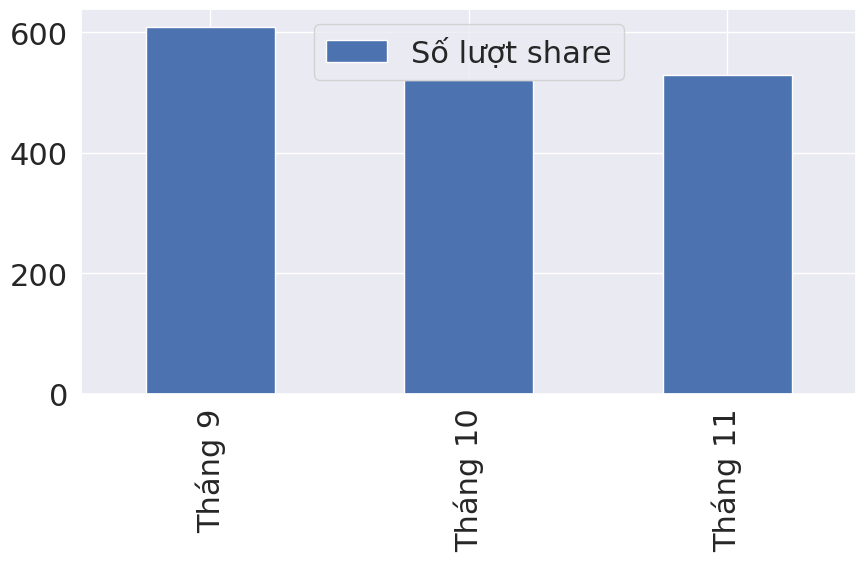

In [93]:
shares_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].shares)
shares_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].shares)
shares_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].shares)
l = pd.DataFrame({'Số lượt share': [shares_of_month_9,shares_of_month_10,shares_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,5))

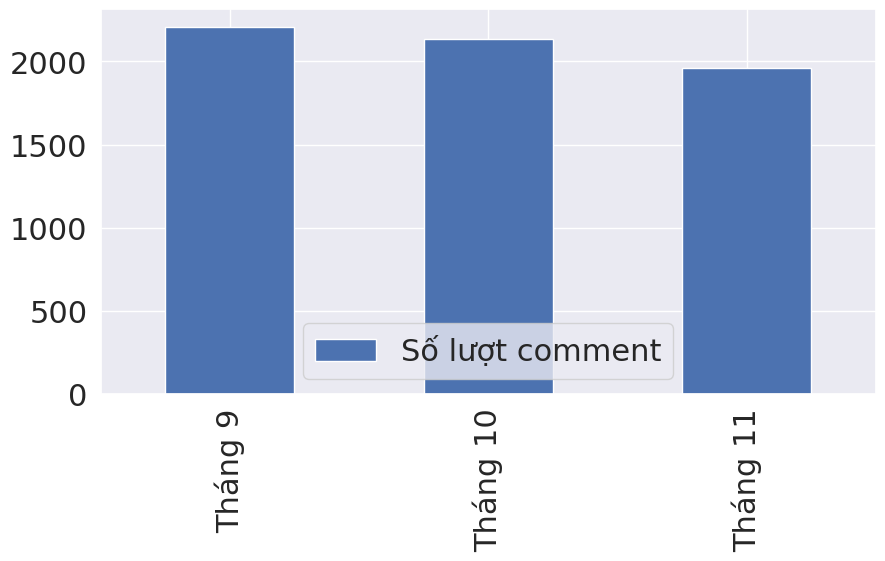

In [94]:
cm_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].comments)
cm_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].comments)
cm_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].comments)
l = pd.DataFrame({'Số lượt comment': [cm_of_month_9,cm_of_month_10,cm_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,5))

Nhận xét: Tháng 10 có số lượt tương tác của các reaction cao nhất. Tháng 10 cũng là tháng có nhiều lượt comment và lượt share nhất trong 3 tháng gần nhất 


Lượng tương tác theo từng tháng 


In [95]:
month_data = pd.DataFrame({"Thích" : [likes_of_month_9, likes_of_month_10, likes_of_month_11],
                           "Yêu_thích" : [loves_of_month_9, loves_of_month_10, loves_of_month_11],
                           "Wow" : [wow_of_month_9, wow_of_month_10, wow_of_month_11],
                           "Haha" : [haha_of_month_9, haha_of_month_10, haha_of_month_11],
                           "Thương_thương" : [tt_of_month_9, tt_of_month_10, tt_of_month_11],
                           "Buồn" : [buon_of_month_9, buon_of_month_10, buon_of_month_11],
                           "Phẫn_nộ" : [phan_no_of_month_9, phan_no_of_month_10, phan_no_of_month_11],
                           "Shares" : [shares_of_month_9, shares_of_month_10, shares_of_month_11],
                           "Comment" : [cm_of_month_9, cm_of_month_10, cm_of_month_11]})
month_data.index = ['Tháng_9', 'Tháng_10', 'Tháng_11']
month_data

,Thích,Yêu_thích,Wow,Haha,Thương_thương,Buồn,Phẫn_nộ,Shares,Comment
Tháng_9,22788,6408,67,175,201,480,3,608,2204
Tháng_10,13942,5788,59,175,199,26,0,520,2136
Tháng_11,14622,5289,70,1044,223,129,1,529,1959


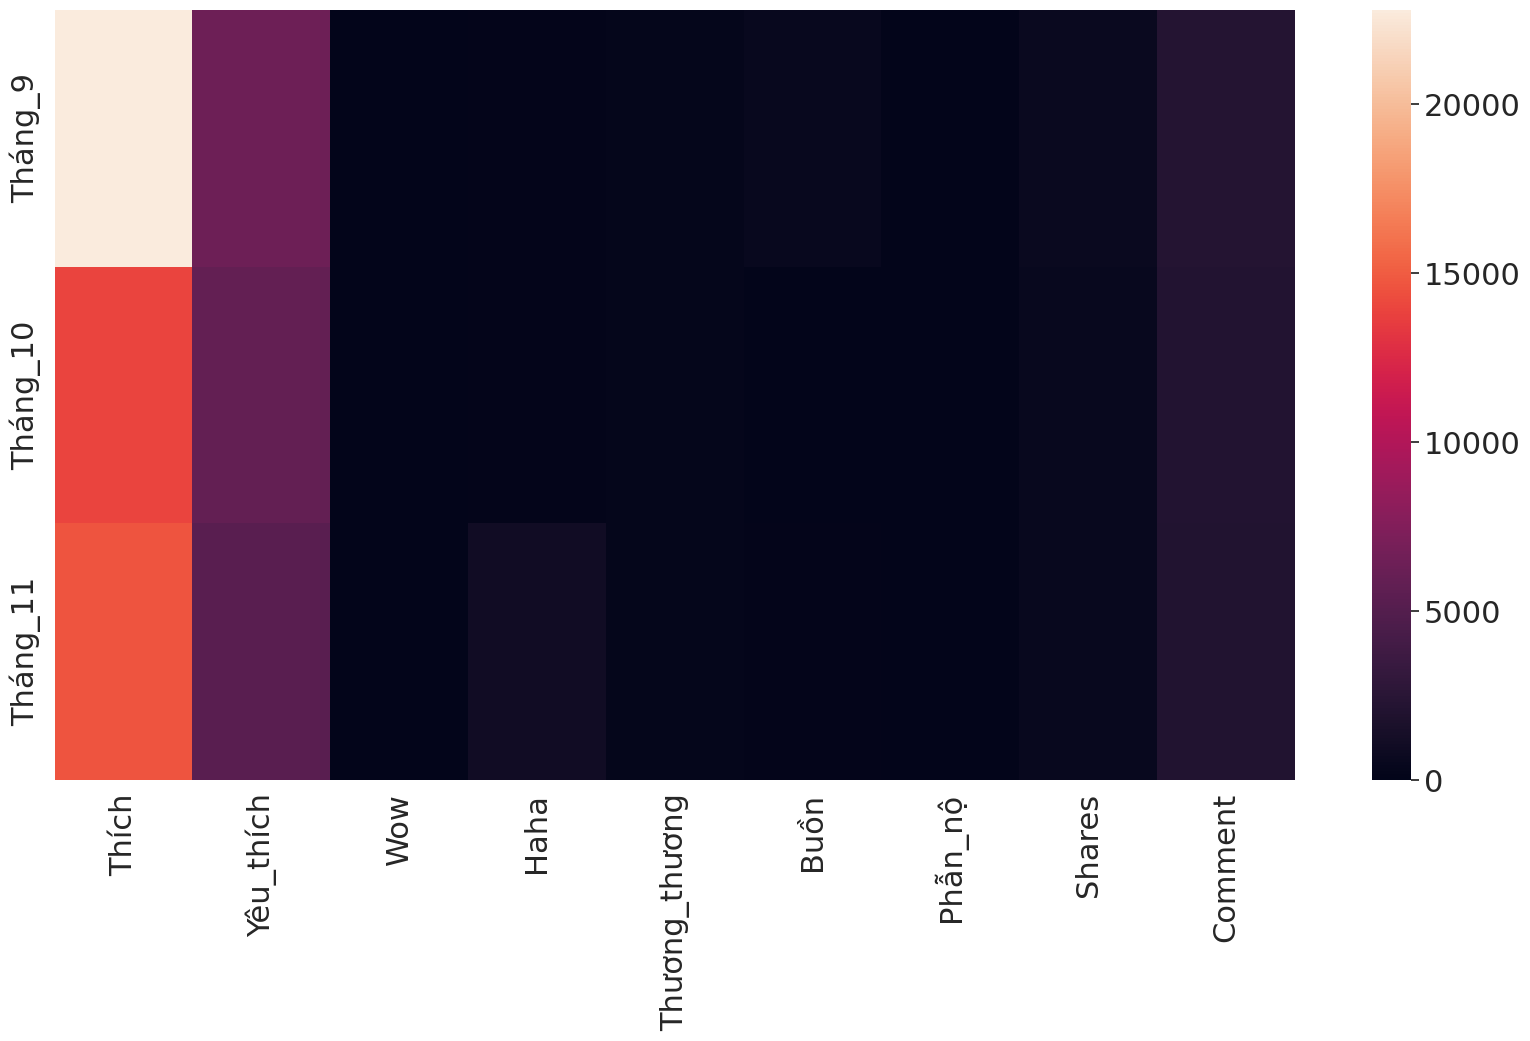

In [96]:
display_sample = sns.heatmap(month_data)

<Axes: >

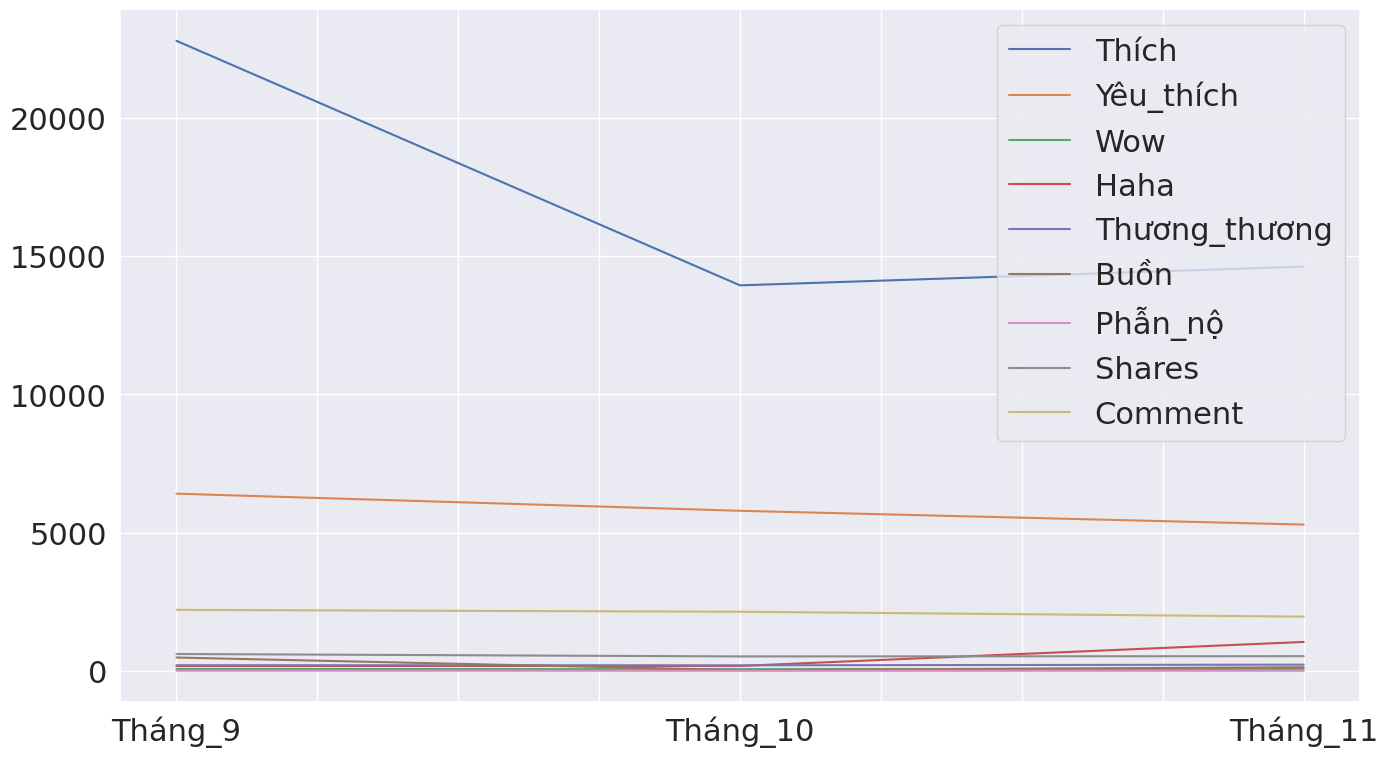

In [97]:
month_data.plot(figsize=(16,9))

<Axes: xlabel='count'>

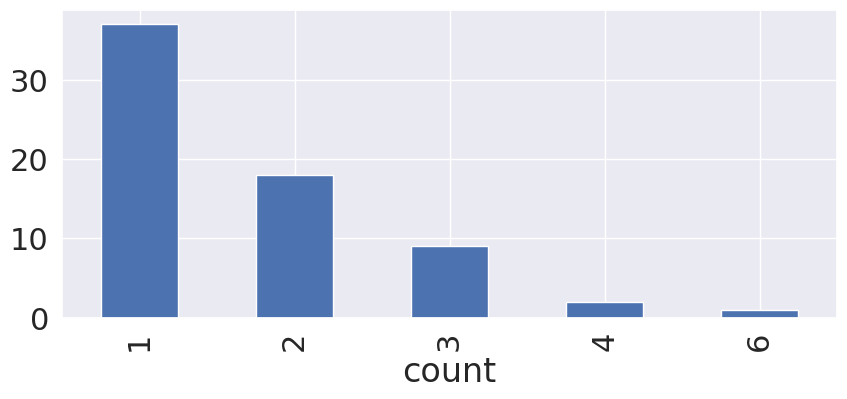

In [98]:
cleaned_data['Date'].value_counts().value_counts().plot(kind = 'bar', figsize=(10,4))

Có thể thấy ngày 20/10 là ngày phụ nữ việt nam và cũng là ngày page có số lượng bài đăng nhiều nhất  

Phân tích về người bình luận 

In [99]:
'''
commenter_name
commenter_id
comment_text
'''
import re
commenter_name = []
commenter_id = []
comment_text = []
for i in cleaned_data['comments_full']:
    input_string = i
    s = input_string.split(",")
    for i in s:
        data_string = i
        match_commenter_id = re.search(r"'commenter_id': '(\d+)'", data_string)
        match_commenter_name = re.search(r"'commenter_name': '([^']+)'", data_string)
        match_comment_text = re.search(r"'comment_text': '([^']+)'", data_string)
        if match_commenter_id:
            id = match_commenter_id.group(1)
            commenter_id.append(id)
        elif match_commenter_name:
            name = match_commenter_name.group(1)
            commenter_name.append(name)   
        elif match_comment_text:
            text = match_comment_text.group(1)
            comment_text.append(text)   

In [100]:
'''
profiles = []
for i in range (len(commenter_id)):
    try:
        u = get_profile(str(commenter_id[i]))
        profiles.append(u)
        print("Added profile no" + str(len(profiles)))
    except:
        continue
'''        

'\nprofiles = []\nfor i in range (len(commenter_id)):\n    try:\n        u = get_profile(str(commenter_id[i]))\n        profiles.append(u)\n        print("Added profile no" + str(len(profiles)))\n    except:\n        continue\n'

In [101]:
#len(profiles)

Các từ có tần xuất xuất hiện nhiều trong các bài viết

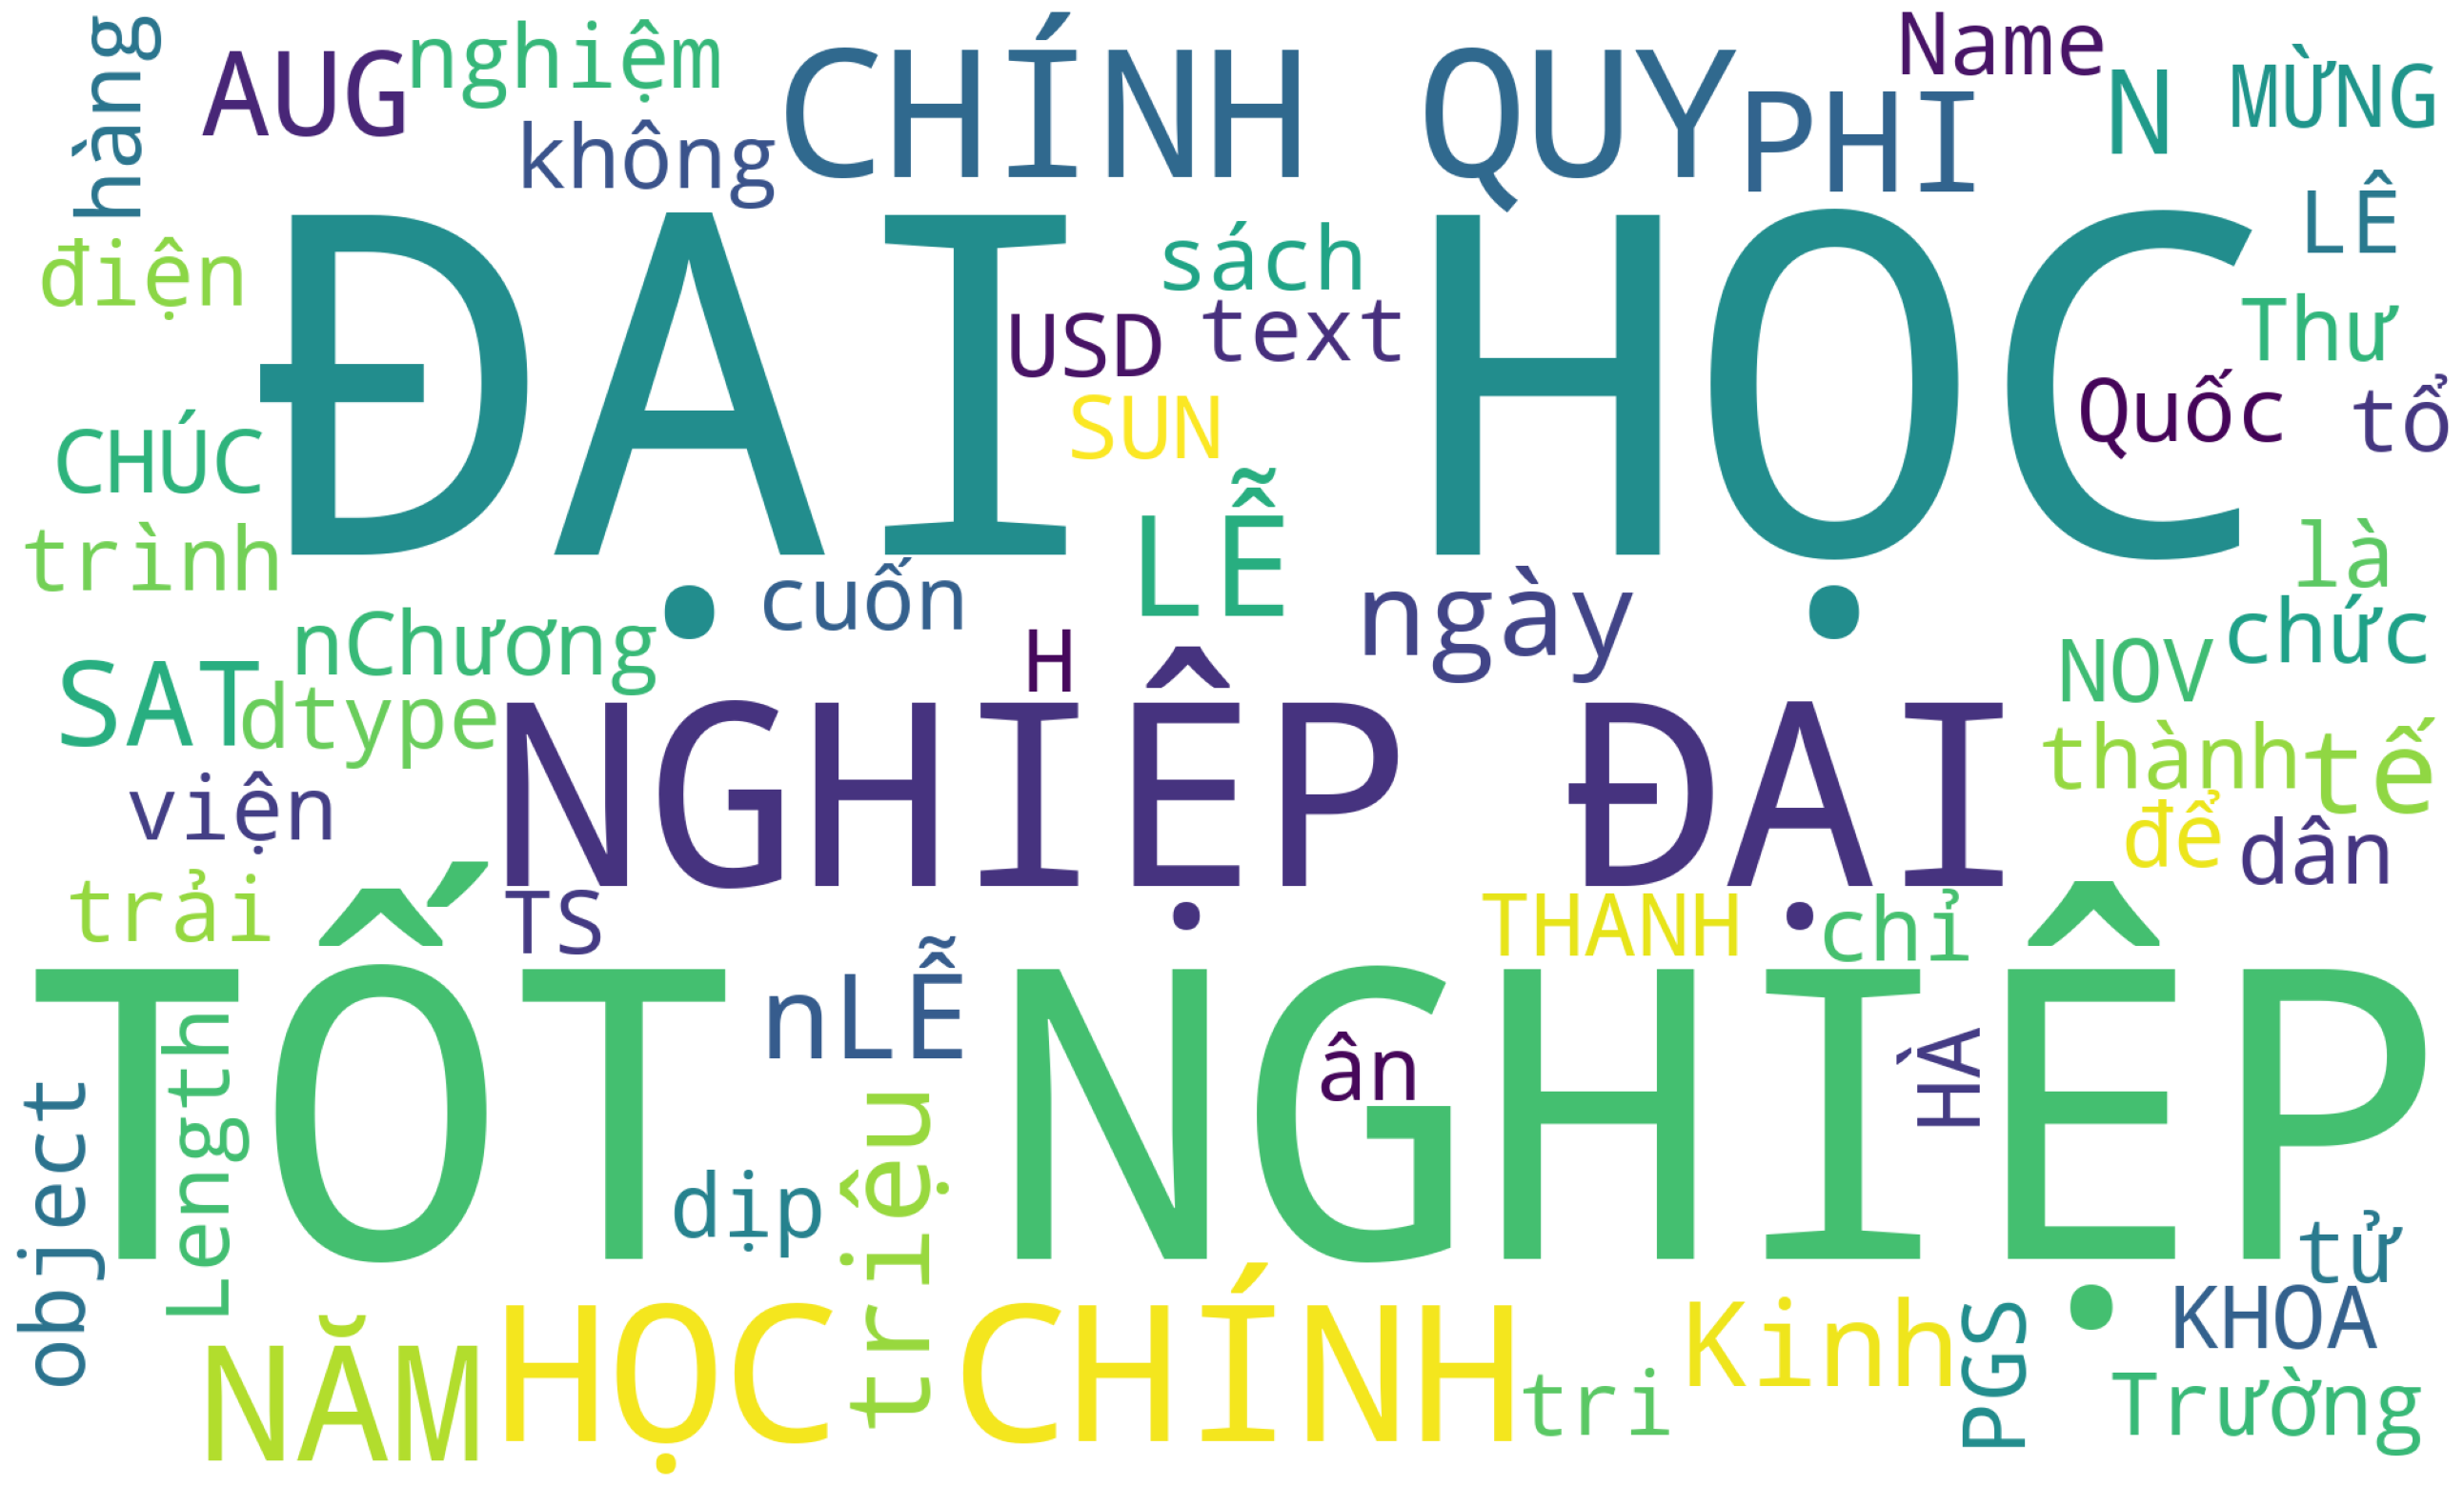

In [102]:
from wordcloud import WordCloud, STOPWORDS

text = str(cleaned_data['text'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [103]:
from collections import Counter
def thong_ke_tan_suat_tu(bai_viet):
    words = re.findall(r'\b\w+\b', bai_viet.lower())
    tan_suat = Counter(words)
    return tan_suat
f = thong_ke_tan_suat_tu(text)
f

Counter({'đại': 6,
         'học': 6,
         'tốt': 5,
         'nghiệp': 5,
         'chính': 5,
         'quy': 5,
         'năm': 4,
         '26': 3,
         'lễ': 3,
         '2023': 3,
         'phi': 3,
         '11': 2,
         'triệu': 2,
         '1': 2,
         'ngày': 2,
         'kinh': 2,
         'tế': 2,
         'sat': 2,
         'aug': 2,
         'nlễ': 2,
         'n': 2,
         '0': 1,
         'thư': 1,
         'viện': 1,
         'điện': 1,
         'tử': 1,
         'usd': 1,
         'cuốn': 1,
         'sách': 1,
         'sun': 1,
         'nov': 1,
         'nchương': 1,
         'trình': 1,
         'trải': 1,
         'nghiệm': 1,
         '2': 1,
         'trường': 1,
         'quốc': 1,
         'dân': 1,
         'tổ': 1,
         'chức': 1,
         'thành': 1,
         '3': 1,
         'chúc': 1,
         'mừng': 1,
         'pgs': 1,
         'ts': 1,
         'lê': 1,
         'thanh': 1,
         'hà': 1,
         'khoa': 1,
         'h': 

Các từ có tần xuất xuất hiện nhiều trong các bình luận 

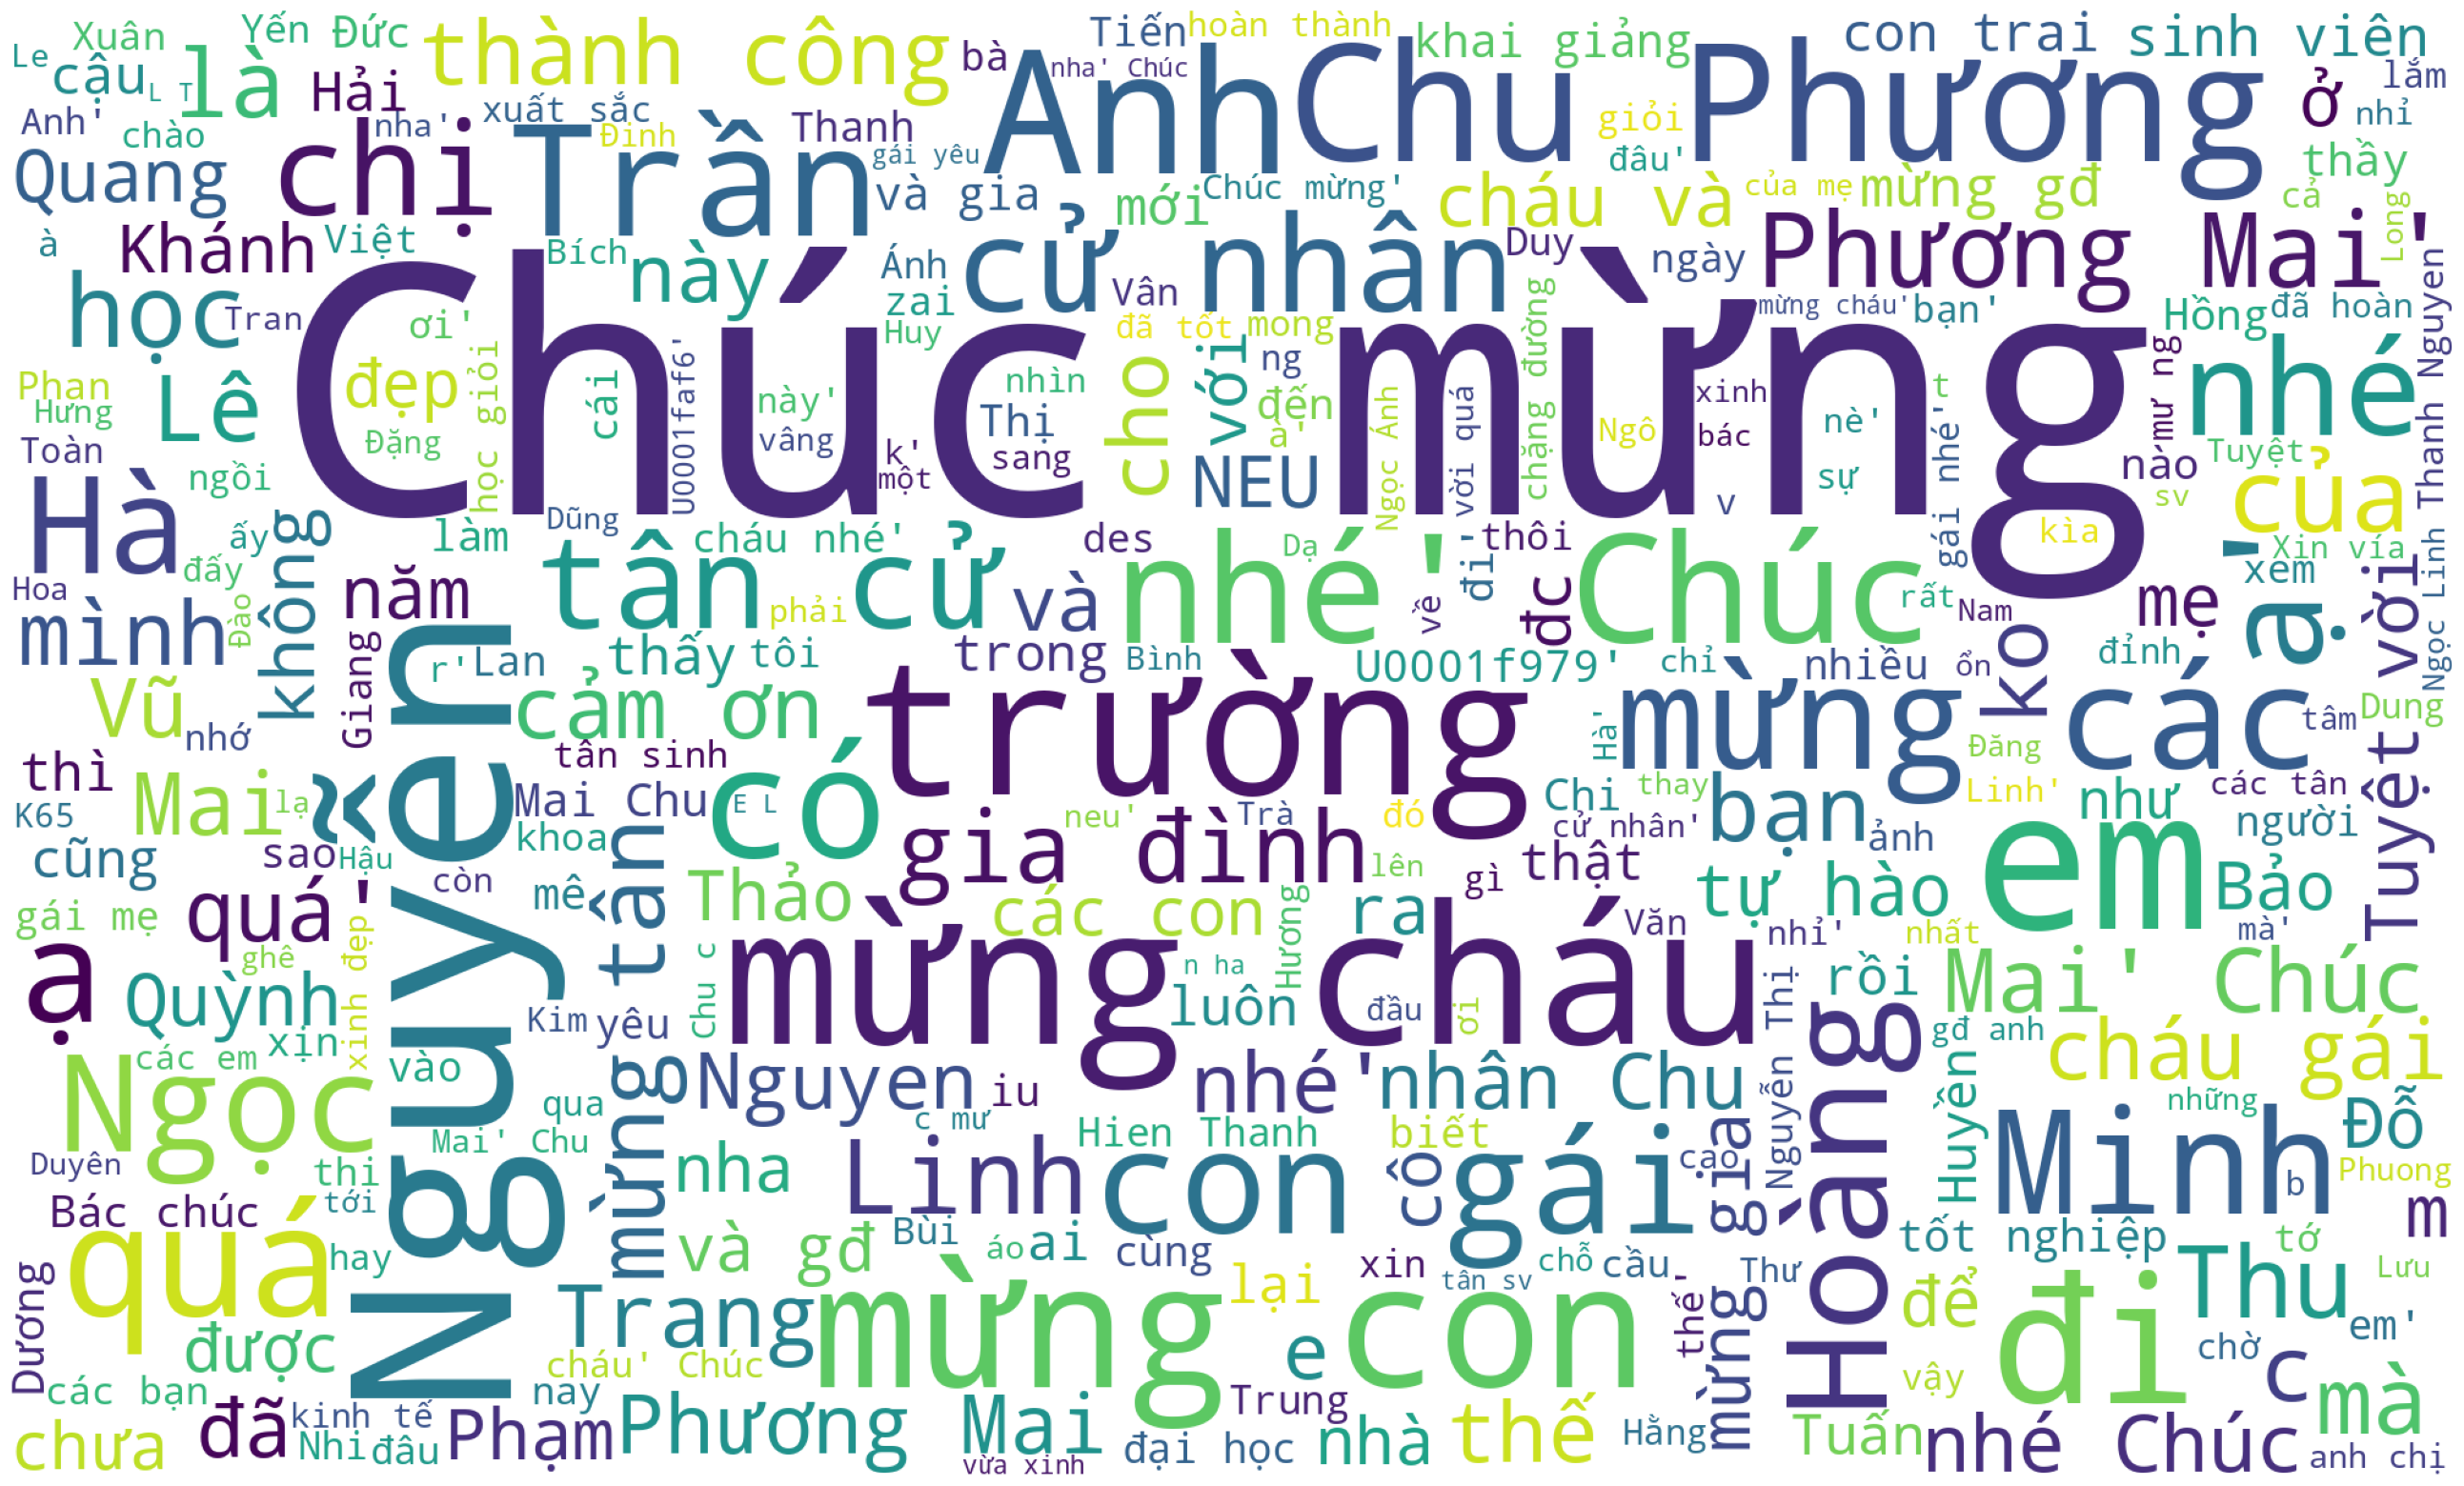

In [104]:
commnent = str(comment_text)
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(commnent)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [105]:
f1 = thong_ke_tan_suat_tu(commnent)
f1

Counter({'chúc': 778,
         'mừng': 700,
         'nhé': 259,
         'con': 235,
         'cháu': 224,
         'nguyễn': 218,
         'phương': 187,
         'em': 177,
         'quá': 175,
         'anh': 173,
         'mai': 173,
         'gái': 168,
         'trường': 155,
         'ạ': 145,
         'đi': 134,
         'và': 132,
         'các': 131,
         'học': 124,
         'chu': 124,
         'chị': 103,
         'có': 98,
         'tân': 96,
         'linh': 95,
         'ngọc': 94,
         'hà': 89,
         'trần': 89,
         'nhân': 85,
         'thành': 82,
         'bạn': 81,
         'minh': 79,
         'c': 78,
         'cử': 76,
         'hoàng': 74,
         'thu': 72,
         'trang': 72,
         'của': 69,
         'gia': 69,
         'n': 67,
         'công': 65,
         't': 65,
         'đình': 64,
         'đã': 64,
         'này': 64,
         'e': 64,
         'gđ': 64,
         'mà': 61,
         'nguyen': 61,
         'mẹ': 61,
         'th

Mô hình và dự đoán 

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [107]:
feature_cols = feature_cols = ['Thích','Yêu_thích','shares', 'comments']
X = cleaned_data[feature_cols].values
y = cleaned_data.reaction_count.values

In [108]:
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(114, 4)
(114,)
(102, 4)
(12, 4)
(102,)
(12,)


In [109]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Bước 4: Dự đoán
y_pred = knn_model.predict(X_test)

# Bước 5: Đánh giá mô hình (ví dụ: sử dụng accuracy_score)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)


In [110]:
y_pred

array([ 544, 1083,  335,  472,  189,  120,    0, 1564, 2490,   85,    0,
       1083])

In [111]:
y_test

array([ 706, 1118,  338,  533,  204,  133,    0, 2032, 3158,   89,    0,
       1151])

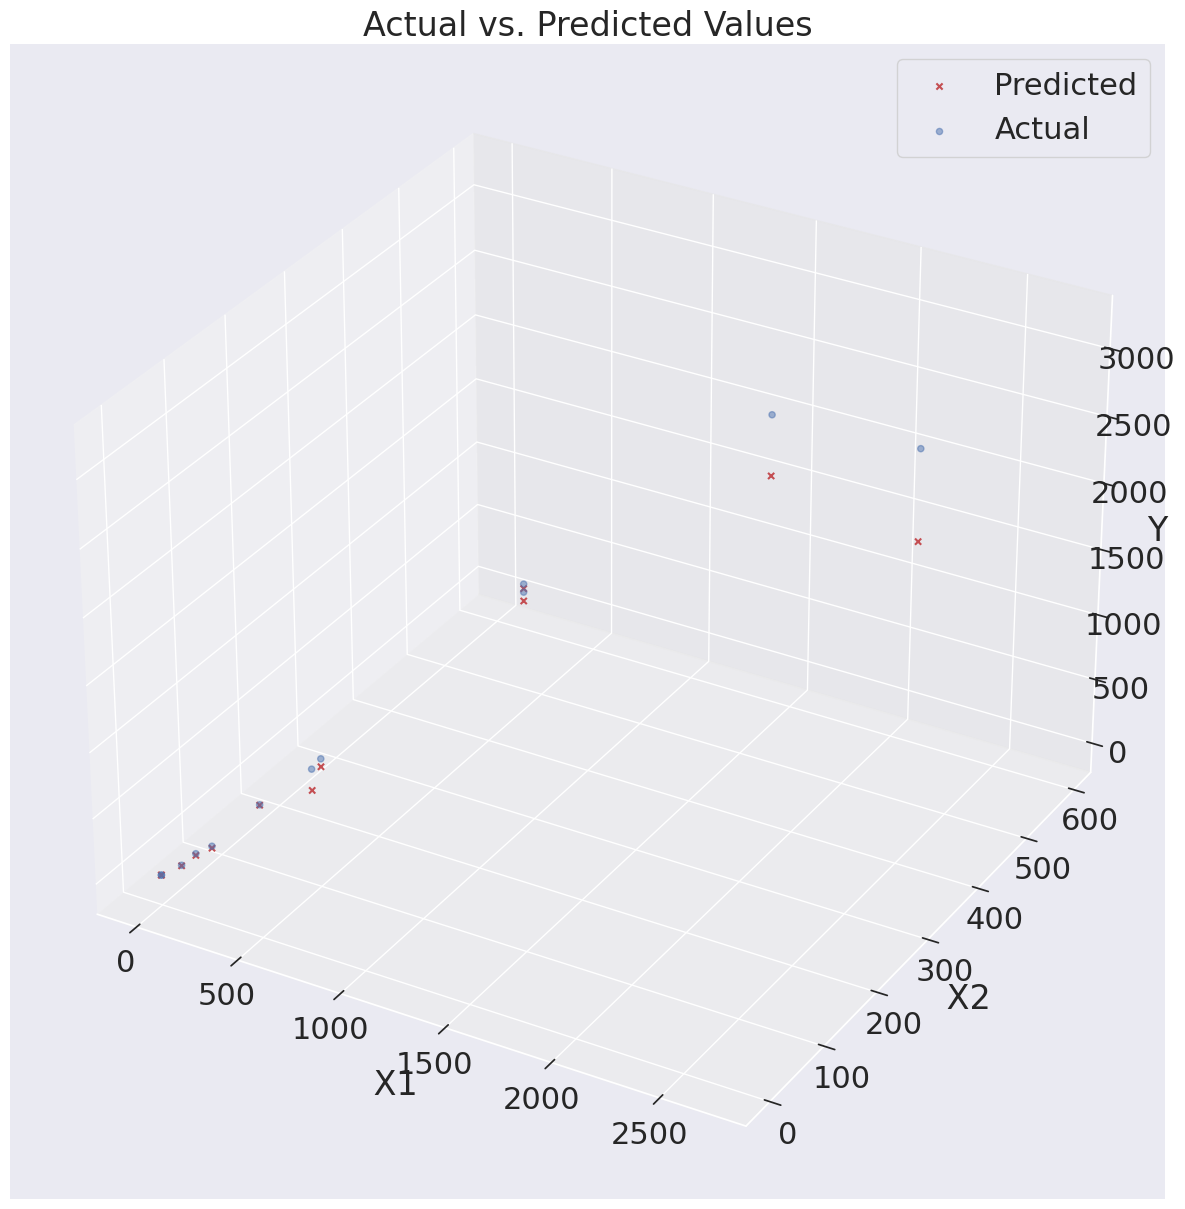

In [112]:
# Let plot two of our features against our target variable:

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the predicted values
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='r', marker='x', label='Predicted', alpha=1)

# Scatter plot for the original data
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c='b', marker='o', label='Actual', alpha=0.5)

ax.set_xlabel("\n" + ' X1')
ax.set_ylabel("\n" + ' X2')
ax.set_zlabel('Y')
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()